## Challenges: Classification Error.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer

from sklearn.cross_validation import cross_val_score
from sklearn.learning_curve import learning_curve

In [2]:
df = pd.read_csv("house-votes-84.csv", header = None)

In [3]:
df.columns = ['party','hndc_inf','water_project','budget_res','phys_fee','salvador','relig_grp','sattelite','nicaragua',
             'missile','immigration','synfuels','education','superfund', 'crime','dutyt_free','south_africa']

### Challenge 1

In [4]:
df = df.replace(to_replace = ['y','n','?'], value = [1,0,None])
df = df.fillna(df.mean(axis = 0));

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.3,random_state=4444)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_hat = knn.predict(x_test)
prec, recall, fscore, _ = precision_recall_fscore_support(y_test,y_hat)
acc = accuracy_score(y_test,y_hat)
prec, recall, fscore, _ = precision_recall_fscore_support(y_test,y_hat, pos_label = 'democrat', average = 'binary')
temp = dict(zip(['precision','accuracy','recall','f1_score'],[prec, acc, recall, fscore]))
scores = pd.DataFrame(temp, index = ['KNN'])


LR = LogisticRegression()
LR.fit(x_train,y_train)
y_hat = LR.predict(x_test)
acc = accuracy_score(y_test,y_hat)
prec, recall, fscore, _ = precision_recall_fscore_support(y_test,y_hat, pos_label = 'democrat', average = 'binary')
temp = dict(zip(['precision','accuracy','recall','f1_score'],[prec, acc, recall, fscore]))
scores = scores.append(pd.DataFrame(temp, index = ['Logit']))


model = GaussianNB()
model.fit(x_train,y_train)
y_hat = model.predict(x_test)
acc = accuracy_score(y_test,y_hat)
prec, recall, fscore, _ = precision_recall_fscore_support(y_test,y_hat, pos_label = 'democrat', average = 'binary')
temp = dict(zip(['precision','accuracy','recall','f1_score'],[prec, acc, recall, fscore]))
scores = scores.append(pd.DataFrame(temp, index = ['GaussianNB']))

model = SVC()
model.fit(x_train,y_train)
y_hat = model.predict(x_test)
prec, recall, fscore, _ = precision_recall_fscore_support(y_test,y_hat)
acc = accuracy_score(y_test,y_hat)
prec, recall, fscore, _ = precision_recall_fscore_support(y_test,y_hat, pos_label = 'democrat', average = 'binary')
temp = dict(zip(['precision','accuracy','recall','f1_score'],[prec, acc, recall, fscore]))
scores = scores.append(pd.DataFrame(temp, index = ['SVC']))

model = RandomForestClassifier()
model.fit(x_train,y_train)
y_hat = model.predict(x_test)
prec, recall, fscore, _ = precision_recall_fscore_support(y_test,y_hat)
acc = accuracy_score(y_test,y_hat)
prec, recall, fscore, _ = precision_recall_fscore_support(y_test,y_hat, pos_label = 'democrat', average = 'binary')
temp = dict(zip(['precision','accuracy','recall','f1_score'],[prec, acc, recall, fscore]))
scores = scores.append(pd.DataFrame(temp, index = ['Random Forest']))

print('Compare accuracy. precision, f-score and recall for choosing a Democrat representative:')
scores

Compare accuracy. precision, f-score and recall for choosing a Democrat representative:


,accuracy,f1_score,precision,recall
KNN,0.916031,0.929032,0.923077,0.935065
Logit,0.938931,0.949367,0.925926,0.974026
GaussianNB,0.938931,0.950000,0.915663,0.987013
SVC,0.954198,0.961538,0.949367,0.974026
Random Forest,0.961832,0.968553,0.939024,1.000000


### Challenge 2

In [7]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
fprLR, tprLR, thresholdsLR = roc_curve(y_test, LR.predict_proba(x_test)[:,0], pos_label = 'democrat')
#there is an indication of a bug in roc_auc_score that throws "pos_label required" error,
#when I try to use string labeled data
aucLR = roc_auc_score(y_test.replace(to_replace=['democrat','republican'],value=[1,0]), LR.predict_proba(x_test)[:,0])

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
fprKNN, tprKNN, thresholdsKNN = roc_curve(y_test, knn.predict_proba(x_test)[:,0], pos_label = 'democrat')
aucKNN = roc_auc_score(y_test.replace(to_replace=['democrat','republican'],value=[1,0]), KNN.predict_proba(x_test)[:,0])


GNB = GaussianNB()
GNB.fit(x_train,y_train)
fprGNB, tprGNB, thresholdsGNB = roc_curve(y_test, GNB.predict_proba(x_test)[:,0], pos_label = 'democrat')
aucGNB = roc_auc_score(y_test.replace(to_replace=['democrat','republican'],value=[1,0]), GNB.predict_proba(x_test)[:,0])

SVCm = SVC(probability=True)
SVCm.fit(x_train,y_train)
fprSVCm, tprSVCm, thresholdsSVCm = roc_curve(y_test, SVCm.predict_proba(x_test)[:,0], pos_label = 'democrat')
aucSVCm = roc_auc_score(y_test.replace(to_replace=['democrat','republican'],value=[1,0]), SVCm.predict_proba(x_test)[:,0])

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
fprRFC, tprRFC, thresholdsRFC = roc_curve(y_test, RFC.predict_proba(x_test)[:,0], pos_label = 'democrat')
aucRFC = roc_auc_score(y_test.replace(to_replace=['democrat','republican'],value=[1,0]), RFC.predict_proba(x_test)[:,0])

print('auc for logistic regression is', "{0:.4f}".format(aucLR))
print('auc for SVC is', "{0:.4f}".format(aucSVCm))
print('auc for Random Forest is', "{0:.4f}".format(aucRFC))
print('auc for GaussianNB is', "{0:.4f}".format(aucRFC))
print('auc for RFC is', "{0:.4f}".format(aucRFC))


auc for logistic regression is 0.9877
auc for SVC is 0.9949
auc for Random Forest is 0.9945
auc for GaussianNB is 0.9945
auc for RFC is 0.9945


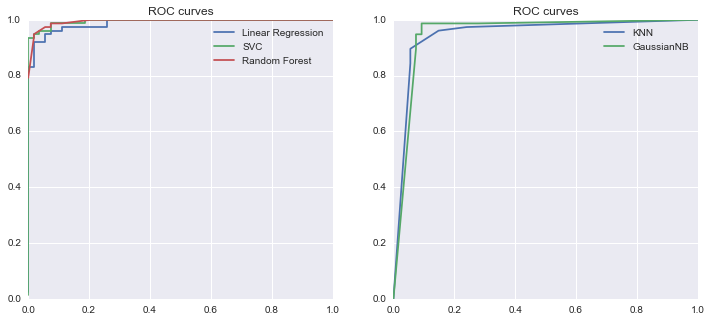

In [8]:
f = plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
p1, = plt.plot(fprLR,tprLR)
p2, = plt.plot(fprSVCm,tprSVCm)
p3, = plt.plot(fprRFC,tprRFC)
plt.legend([p1,p2,p3],['Linear Regression', 'SVC','Random Forest'])
plt.title('ROC curves')

plt.subplot(1,2,2)
p4, = plt.plot(fprKNN,tprKNN)
p5, = plt.plot(fprGNB,tprGNB)
plt.legend([p4,p5],['KNN', 'GaussianNB'])
plt.title('ROC curves');

### Challenge 3

In [9]:
from sklearn.cross_validation import cross_val_score

In [10]:
classifiers = [LogisticRegression(), GaussianNB(), RandomForestClassifier(), SVC(), KNeighborsClassifier(n_neighbors=5)]
names = ['Logit','GaussianNB','Random Forest','SVC', 'KNN']

y = df.iloc[:,0].replace(to_replace=['democrat','republican'],value=[1,0])

for ind, cls in enumerate(classifiers):
    accuracy = cross_val_score(cls, df.iloc[:,1:], y, cv=3, scoring='accuracy')
    recall = cross_val_score(cls, df.iloc[:,1:], y, cv=3, scoring='recall')
    precision = cross_val_score(cls, df.iloc[:,1:], y, cv=3, scoring='precision')
    f1 = cross_val_score(cls, df.iloc[:,1:], y, cv=3, scoring='f1')
    
    temp = dict(zip(['precision','accuracy','recall','f1'],[precision.mean(), accuracy.mean(), recall.mean(), f1.mean()]))
    if ind == 0:
        scores2 = pd.DataFrame(temp, index =[names[ind]])
    else:
        scores2 = scores2.append(pd.DataFrame(temp, index =[names[ind]]))

In [11]:
scores2

,accuracy,f1,precision,recall
Logit,0.960920,0.967864,0.970163,0.966292
GaussianNB,0.931034,0.943525,0.948219,0.940075
Random Forest,0.967816,0.969652,0.980884,0.962547
SVC,0.954023,0.961804,0.977123,0.947566
KNN,0.933333,0.944804,0.961372,0.928839


### Challenge 4

In [12]:
import sklearn.preprocessing
from statsmodels.formula.api import Logit
from patsy import dmatrices

In [13]:
df = pd.read_csv("2013_movies.csv")
df.head(5)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [14]:
X = df[['Budget','DomesticTotalGross','Runtime']].copy()
X.Budget = X.Budget.fillna(X.Budget.mean())
X.DomesticTotalGross = X.DomesticTotalGross.fillna(X.DomesticTotalGross.mean())
X.Runtime = X.Runtime.fillna(X.Runtime.mean())
y = df.Rating

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=4444)
scaler = sklearn.preprocessing.StandardScaler().fit(X)


knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(scaler.transform(x_train),y_train)
y_hat = knn.predict(scaler.transform(x_test))
prec, recall, fscore, _ = precision_recall_fscore_support(y_test,y_hat)
print('KNN classifier for movie data:')
print('labels', knn.classes_)
print('precision = ', prec)
print('recall = ', recall)
print('\n')
    
    
LR = LogisticRegression()
LR.fit(scaler.transform(x_train),y_train)
y_hat = LR.predict(scaler.transform(x_test))
prec, recall, fscore, _ = precision_recall_fscore_support(y_test,y_hat)
print('Logistic Regression classifier for movie data:')
print('labels', knn.classes_)
print('precision = ', prec)
print('recall = ', recall)
    

KNN classifier for movie data:
labels ['G' 'PG' 'PG-13' 'R']
precision =  [ 0.5         0.47619048  0.2       ]
recall =  [ 0.28571429  0.71428571  0.11111111]


Logistic Regression classifier for movie data:
labels ['G' 'PG' 'PG-13' 'R']
precision =  [ 1.          0.625       0.46153846]
recall =  [ 0.14285714  0.71428571  0.66666667]


### Challenge 12

In [16]:
df = pd.read_csv('haberman.csv', header = None)
df.columns = ['age_at_diag', 'surgery','lymph_nodes','survival']

In [18]:
df.survival = df.survival.replace(to_replace=[1,2],value=[0,1])
df.age_at_diag = df.age_at_diag.astype(int)
df.lymph_nodes = df.lymph_nodes.astype(int)
df.surgery = df.surgery.astype(int);

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:3],df.iloc[:,-1],test_size=0.3,random_state=4444)

In [20]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
fprLR, tprLR, thresholdsLR = roc_curve(y_test, LR.predict_proba(x_test)[:,1])
aucLR = roc_auc_score(y_test, LR.predict_proba(x_test)[:,1])


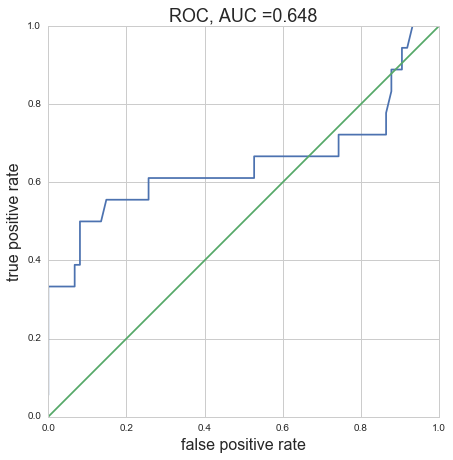

In [21]:
plt.figure(figsize = (7,7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

p1, = plt.plot(fprLR, tprLR)
p2, = plt.plot([0,1],[0,1])

plt.xlabel('false positive rate', fontsize = 16)
plt.ylabel('true positive rate', fontsize = 16)
plt.title("ROC, AUC =" + "{0:.3f}".format(aucLR) , fontsize=18);
